Epoch 1/50


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2515 - loss: 1.1715 - val_accuracy: 0.3818 - val_loss: 1.0791
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4322 - loss: 1.0718 - val_accuracy: 0.4182 - val_loss: 1.0587
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4518 - loss: 1.0354 - val_accuracy: 0.4545 - val_loss: 1.0459
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4590 - loss: 1.0138 - val_accuracy: 0.4909 - val_loss: 1.0240
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5138 - loss: 0.9816 - val_accuracy: 0.4364 - val_loss: 1.0197
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5051 - loss: 0.9804 - val_accuracy: 0.4727 - val_loss: 1.0015
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5777 - loss: 0.9331 - val_accuracy: 0.4727 - val_loss: 0.9934
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5962 - loss: 0.9169 - val_accuracy: 0.4727 - val_loss: 0.9820
Ep

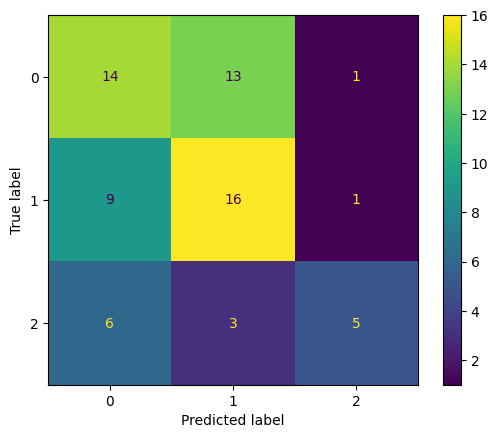


Classification Report:
               precision    recall  f1-score   support

  Monoclinic       0.48      0.50      0.49        28
Orthorhombic       0.50      0.62      0.55        26
   Triclinic       0.71      0.36      0.48        14

    accuracy                           0.51        68
   macro avg       0.57      0.49      0.51        68
weighted avg       0.54      0.51      0.51        68



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\Desktop\ML_FINAL\8th\lithium-ion batteries.csv")

# Filter for crystal systems of interest
df['Crystal System'] = df['Crystal System'].str.lower()
df = df[df['Crystal System'].isin(['monoclinic', 'orthorhombic', 'triclinic'])]

# Encode target variable
label_encoder = LabelEncoder()
df['Crystal System Encoded'] = label_encoder.fit_transform(df['Crystal System'])

# Prepare features and target
X = df[['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 
        'Nsites', 'Density (gm/cc)', 'Volume', 'Has Bandstructure']].values
y = df['Crystal System Encoded'].values

# Split data and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate model
y_pred = model.predict(X_test_scaled).argmax(axis=1)
# Convert probabilities to predicted class labels (0, 1, or 2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Monoclinic', 'Orthorhombic', 'Triclinic']))

